In [47]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
import datetime
import psycopg2
from sqlalchemy import create_engine
import sqlalchemy
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
dropbox_dir = r'C:/Users/cocoy/Dropbox (Palmer Lab)/Palmer Lab/Shae Ziegler/Suzanne_Mitchell_U01'
df_fits = pd.read_csv(dropbox_dir + '/fits.csv')
df_locomotor = pd.read_csv(dropbox_dir + '/locomotor.csv')
df_wfu = pd.read_csv(dropbox_dir + '/wfu_master.csv')

In [16]:
df_fits

,sex,cohort,rfid,coat_color,shipping_box,housing_box,order_in_box,squad_num,box_color,opertant_box,...,expon_adj_R2,expon_AIC,quad_k,quad_R2,quad_adj_R2,quad_AIC,linear_k,linear_R2,linear_adj_R2,linear_AIC
0,m,C02,933000320045751,brown_hood,5,40,2,4,blue,8,...,0.725429,36.342187,0.272698,-1.349954,0.000000,50.562703,6.678471,-0.035885,0.000000,45.647864
1,f,C02,933000320045756,black,11,54,2,5,blue,12,...,0.000000,42.756235,0.259993,-5.508170,0.000000,50.962255,6.338652,-2.516639,0.000000,47.268939
2,f,C02,933000320045757,brown_hood,11,18,2,2,blue,12,...,0.000000,42.401441,0.262557,-4.489528,0.000000,52.609082,6.564409,-2.148642,0.000000,49.273856
3,f,C02,933000320045759,brown_hood,10,52,2,5,blue,8,...,0.920194,32.324584,0.265759,0.378190,0.222737,45.981682,6.163581,0.814850,0.768562,38.712880
4,m,C02,933000320045760,brown,5,39,2,4,blue,6,...,0.879992,35.471797,0.247963,0.533578,0.416973,44.955831,5.690875,0.833890,0.792363,38.761188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,m,C04,933000320047963,black_hood,1,12,2,1,red,8,...,0.378722,39.455651,0.438252,0.506212,0.341616,39.745699,6.498826,0.554768,0.406358,39.228146
391,f,C04,933000320047964,black_hood,6,34,1,3,red,3,...,0.292852,44.912651,0.225828,0.333280,0.166600,45.898297,4.924056,0.460635,0.325794,44.626432
392,m,C04,933000320047968,brown_hood,1,27,1,3,blue,5,...,0.718459,40.902493,0.213945,0.611274,0.514093,44.176931,4.788950,0.761658,0.702073,41.241926
393,m,C04,933000320047973,black,1,12,1,1,red,7,...,0.897968,32.911002,0.222286,0.833993,0.792491,37.170351,4.822055,0.948307,0.935384,30.170114


In [17]:
df_locomotor

,experiment,cage,rfid,subject_type,subject_age,phase,sample,start_time,total_distance,total_distance_x,...,ambulatory_episode_peak_average_velocity,ambulatory_episode_median_velocity,left-front_time_legacy,right_front_time_legacy,left_rear_time_legacy,right_rear_time_legacy,margin_time_legacy,center_time_legacy,margin_distance_legacy,center_distance_legacy
0,U01-t1-gp10,Cage 1,45897,19-black,11,Phase 1,1,4:02:56 PM,225.06,130.60,...,26.48,17.66,9.76,0.05,2.74,3.42,57.45,2.55,176.09,48.97
1,U01-t1-gp10,Cage 1,45897,19-black,11,Phase 1,2,4:03:56 PM,188.21,81.60,...,20.57,30.35,3.02,3.47,1.14,16.56,59.75,0.25,183.65,4.56
2,U01-t1-gp10,Cage 1,45897,19-black,11,Phase 1,3,4:04:56 PM,226.97,47.31,...,28.80,16.24,0.00,2.31,0.00,18.63,55.84,4.16,169.19,57.78
3,U01-t1-gp10,Cage 1,45897,19-black,11,Phase 1,4,4:05:56 PM,203.53,53.98,...,24.56,18.78,0.02,4.98,0.44,33.64,49.24,10.76,102.59,100.93
4,U01-t1-gp10,Cage 1,45897,19-black,11,Phase 1,5,4:06:56 PM,292.87,148.59,...,22.30,13.25,3.99,0.62,1.16,6.94,56.33,3.67,251.16,41.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19030,U01-t2-gp35,Cage 2,24878,4-mixed/black,12,NaN,11,1:32:21 PM,5.60,1.59,...,11.83,4.05,0.00,0.00,0.00,6.41,60.00,0.00,5.60,0.00
19031,U01-t2-gp35,Cage 2,24878,4-mixed/black,12,NaN,12,1:33:21 PM,235.50,87.00,...,24.27,14.80,3.63,0.00,0.66,4.39,50.10,9.91,145.75,89.74
19032,U01-t2-gp35,Cage 2,24878,4-mixed/black,12,NaN,13,1:34:21 PM,42.44,12.07,...,16.79,11.46,0.00,0.00,32.37,0.00,55.72,4.28,39.24,3.19
19033,U01-t2-gp35,Cage 2,24878,4-mixed/black,12,NaN,14,1:35:21 PM,123.64,63.82,...,25.44,5.97,0.00,4.75,0.05,2.02,50.34,9.66,68.23,55.41


In [18]:
df_wfu

,cohort,sires,dames,labanimalid,accessid,sex,rfid,dob,dow,shipmentdate,...,coatcolor,earpunch,rack,shipmentbox,housingbox,shipmentage,weanage,comments,resolution,last_5
0,C01,72539_1,72595_5,TJ008,73472_2,F,933000320045906,2018-09-24,2018-10-15,2018-10-30,...,BROWNHOOD,RB,D-F4,2.0,9999.0,36.0,21.0,Pregnant female/Impregnated,REMOVE_FROM_EXCLUSION_AND_REPLACE,45906
1,C01,73358_1,73360_1,TJ027,73477_2,F,933000320045890,2018-09-25,2018-10-16,2018-10-30,...,BROWNHOOD,LM,D-G8,4.0,32.0,35.0,21.0,NaN,NaN,45890
2,C01,72539_1,72595_5,TJ003,73472_8,M,933000320045902,2018-09-24,2018-10-15,2018-10-30,...,ALBINO,RT,D-F2,2.0,9999.0,36.0,21.0,Pregnant female/Impregnated,REMOVE_FROM_EXCLUSION_AND_REPLACE,45902
3,C01,72794_1,72775_4,TJ020,73475_4,F,933000320045904,2018-09-25,2018-10-16,2018-10-30,...,BROWN,RB,D-G2,2.0,9999.0,35.0,21.0,Pregnant female/Impregnated,REMOVE_FROM_EXCLUSION_AND_REPLACE,45904
4,C01,72624_1,72596_4,TJ002,73471_5,F,933000320045908,2018-09-23,2018-10-15,2018-10-30,...,BLACK,LT,D-F2,2.0,9999.0,37.0,22.0,Pregnant female/Impregnated,REMOVE_FROM_EXCLUSION_AND_REPLACE,45908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
896,C07,933000320048190,933000320187377,NaN,NaN,F,933000320125436,2020-08-09,2020-09-04,NaN,...,BLACK,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,25436
897,C07,933000320187153,933000320187383,NaN,NaN,F,933000320125437,2020-08-09,2020-09-04,NaN,...,BROWNHOOD,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,25437
898,C07,933000320187217,933000320048245,NaN,NaN,F,933000320125440,2020-08-09,2020-09-04,NaN,...,BROWN,NaN,NaN,NaN,NaN,NaN,26.0,NaN,NaN,25440
899,C07,933000320187249,933000320048234,NaN,NaN,M,933000320125443,2020-08-08,2020-09-04,NaN,...,BLACKHOOD,NaN,NaN,NaN,NaN,NaN,27.0,NaN,NaN,25443


In [26]:
wfu_rfid = df_wfu.last_5.unique()
locomotor_rfid = df_locomotor.rfid.unique()
missmatch = [x for x in wfu_rfid if x not in locomotor_rfid]
print(len(wfu_rfid))
print(len(locomotor_rfid))
len(missmatch)

901
539


364

In [45]:
#create an empty column for cohort for the locomotor df
df_locomotor["cohort"] = np.nan

#loop through each rfid in master table
for i in df_wfu['last_5']:
    #find the index of the rfid
    a = df_wfu.loc[df_wfu['last_5'] == i].index[0]
    #find the cohort of the rfid
    b = df_wfu.iloc[a]['cohort']
    #find all the indeces that have that rfid in locomotor df
    c = df_locomotor.loc[df_locomotor['rfid'] == i].index.tolist()
    #loop through each index
    for index in c:
        #set the cohort value at that index equal to the cohort from wfu_master
        df_locomotor.loc[index,'cohort'] = b
        
df_locomotor


,experiment,cage,rfid,subject_type,subject_age,phase,sample,start_time,total_distance,total_distance_x,...,ambulatory_episode_median_velocity,left-front_time_legacy,right_front_time_legacy,left_rear_time_legacy,right_rear_time_legacy,margin_time_legacy,center_time_legacy,margin_distance_legacy,center_distance_legacy,cohort
0,U01-t1-gp10,Cage 1,45897,19-black,11,Phase 1,1,4:02:56 PM,225.06,130.60,...,17.66,9.76,0.05,2.74,3.42,57.45,2.55,176.09,48.97,C01
1,U01-t1-gp10,Cage 1,45897,19-black,11,Phase 1,2,4:03:56 PM,188.21,81.60,...,30.35,3.02,3.47,1.14,16.56,59.75,0.25,183.65,4.56,C01
2,U01-t1-gp10,Cage 1,45897,19-black,11,Phase 1,3,4:04:56 PM,226.97,47.31,...,16.24,0.00,2.31,0.00,18.63,55.84,4.16,169.19,57.78,C01
3,U01-t1-gp10,Cage 1,45897,19-black,11,Phase 1,4,4:05:56 PM,203.53,53.98,...,18.78,0.02,4.98,0.44,33.64,49.24,10.76,102.59,100.93,C01
4,U01-t1-gp10,Cage 1,45897,19-black,11,Phase 1,5,4:06:56 PM,292.87,148.59,...,13.25,3.99,0.62,1.16,6.94,56.33,3.67,251.16,41.70,C01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19030,U01-t2-gp35,Cage 2,24878,4-mixed/black,12,NaN,11,1:32:21 PM,5.60,1.59,...,4.05,0.00,0.00,0.00,6.41,60.00,0.00,5.60,0.00,C07
19031,U01-t2-gp35,Cage 2,24878,4-mixed/black,12,NaN,12,1:33:21 PM,235.50,87.00,...,14.80,3.63,0.00,0.66,4.39,50.10,9.91,145.75,89.74,C07
19032,U01-t2-gp35,Cage 2,24878,4-mixed/black,12,NaN,13,1:34:21 PM,42.44,12.07,...,11.46,0.00,0.00,32.37,0.00,55.72,4.28,39.24,3.19,C07
19033,U01-t2-gp35,Cage 2,24878,4-mixed/black,12,NaN,14,1:35:21 PM,123.64,63.82,...,5.97,0.00,4.75,0.05,2.02,50.34,9.66,68.23,55.41,C07


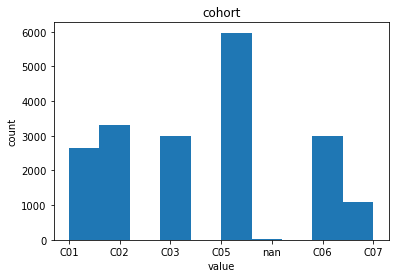

In [50]:
graph_columns = ['cohort']
for col in graph_columns:
    plt.title(col)
    plt.xlabel('value')
    plt.ylabel('count')
    plt.hist(df_locomotor[col].astype(str))
    plt.show() 